# Instructions


The assignment is at the bottom!

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('../data/bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [368]:
bikes.dur.mean()

992.8716543657755

In [369]:
bikes.dur.std()

2073.9809135296514

In [370]:
bikes[bikes.dur>16000].shape

(973, 12)

In [371]:
plt.rcParams['figure.figsize'] = 20, 10

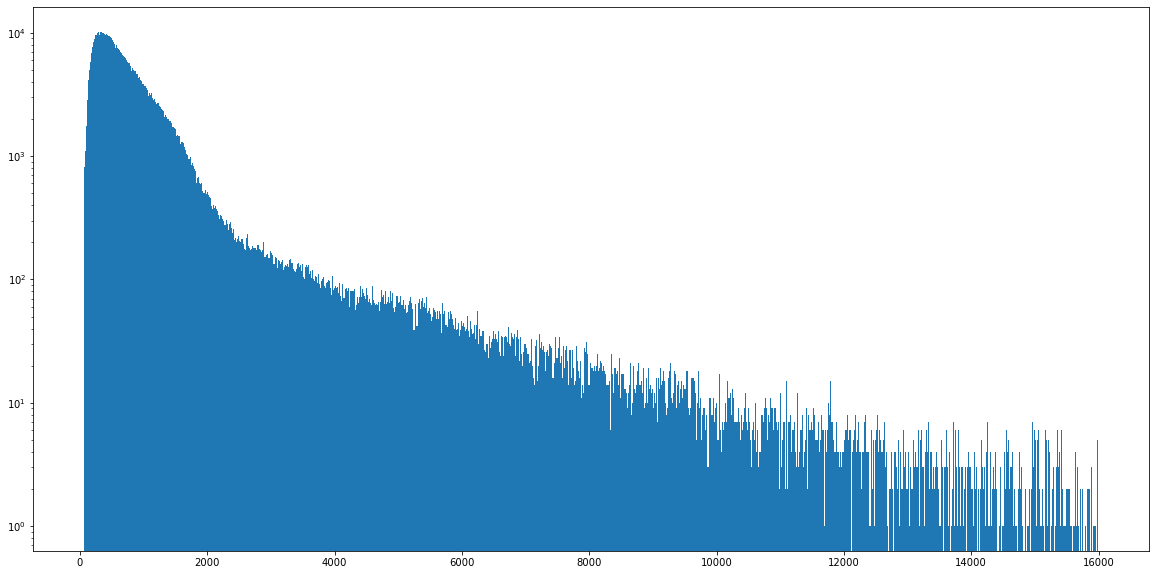

In [372]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [373]:
short = bikes[bikes.dur<16000]

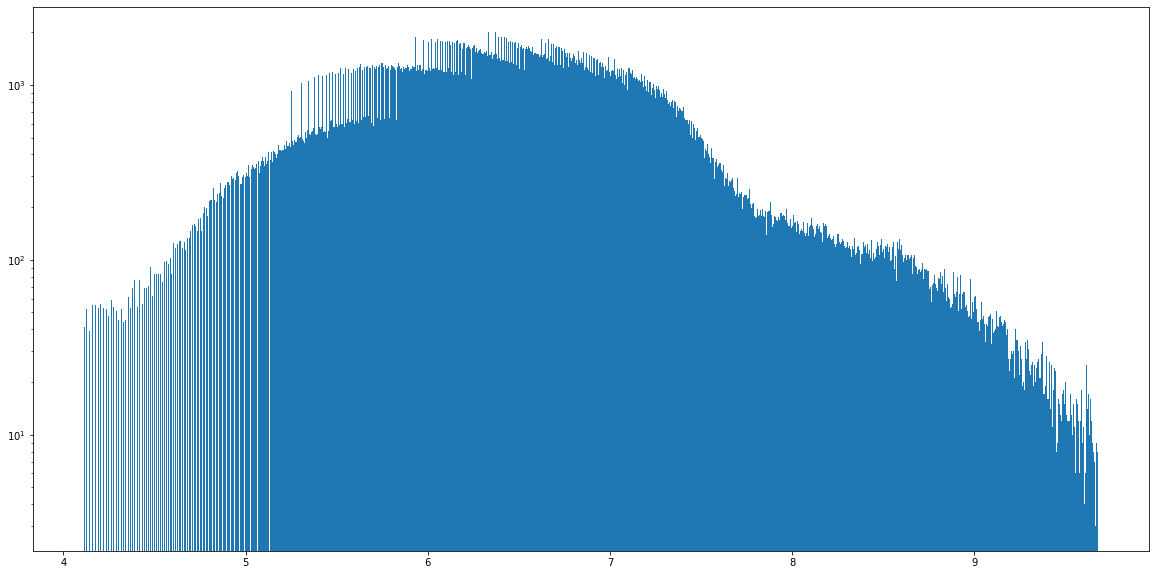

In [374]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

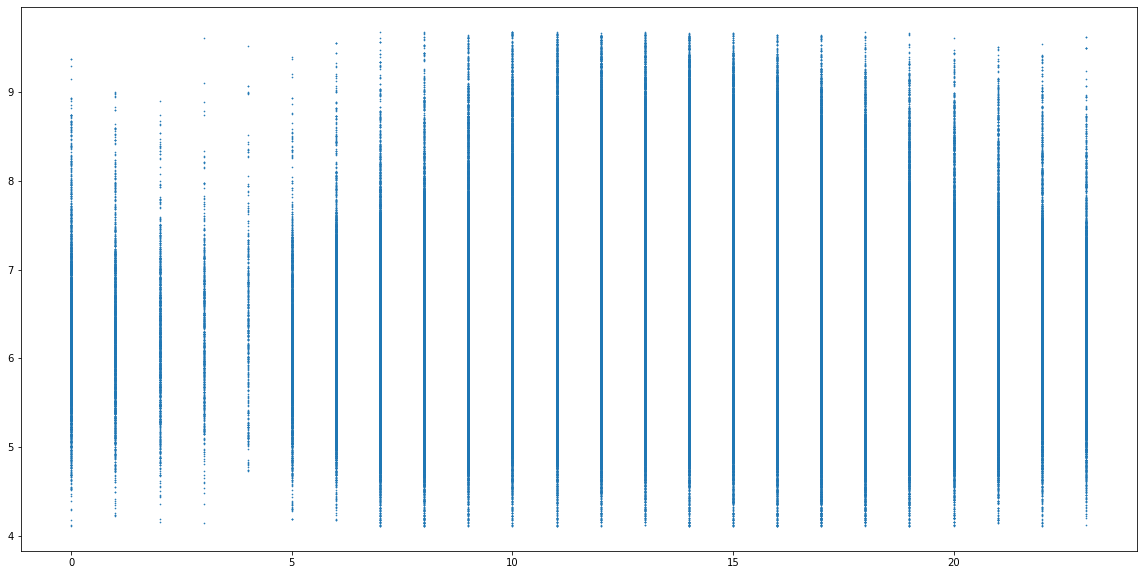

In [375]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [376]:
np.log1p(0), np.log(0)

/var/folders/x7/6srm3p515nl536_rx3q2gtfm0000gn/T/ipykernel_30239/1076539907.py:1: RuntimeWarning: divide by zero encountered in log
  np.log1p(0), np.log(0)


(0.0, -inf)

In [377]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [378]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [379]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [380]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
...                      ...         ...       ...                   ...   
11.2    21                 2           2         2                     2   
11.3    14                 1           1         1                     1   
        17                 1           1         1                     1   
        19                 1           1         1                     1   
11.4    18                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        9                  2                   2            2            2   
        11                 1                   1            1            1   
        14                 2                   2            2            2   
        16                 2                   2            2            2   
...                      ...                 ...          ...          ...   
11.2    21                 2                   2            2            2   
11.3    14                 1                   1            1            1   
        17                 1                   1            1            1   
        19                 1                   1            1            1   
11.4    18                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        9                2      2    2    2  
        11               1      1    1    1  
        14               2      2    2    2  
        16               2      2    2    2  
...                    ...    ...  ...  ...  
11.2    21               2      2    2    2  
11.3    14               1      1    1    1  
        17               1      1    1    1  
        19               1      1    1    1  
11.4    18               1      1    1    1  

[1184 rows x 12 columns]

In [381]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


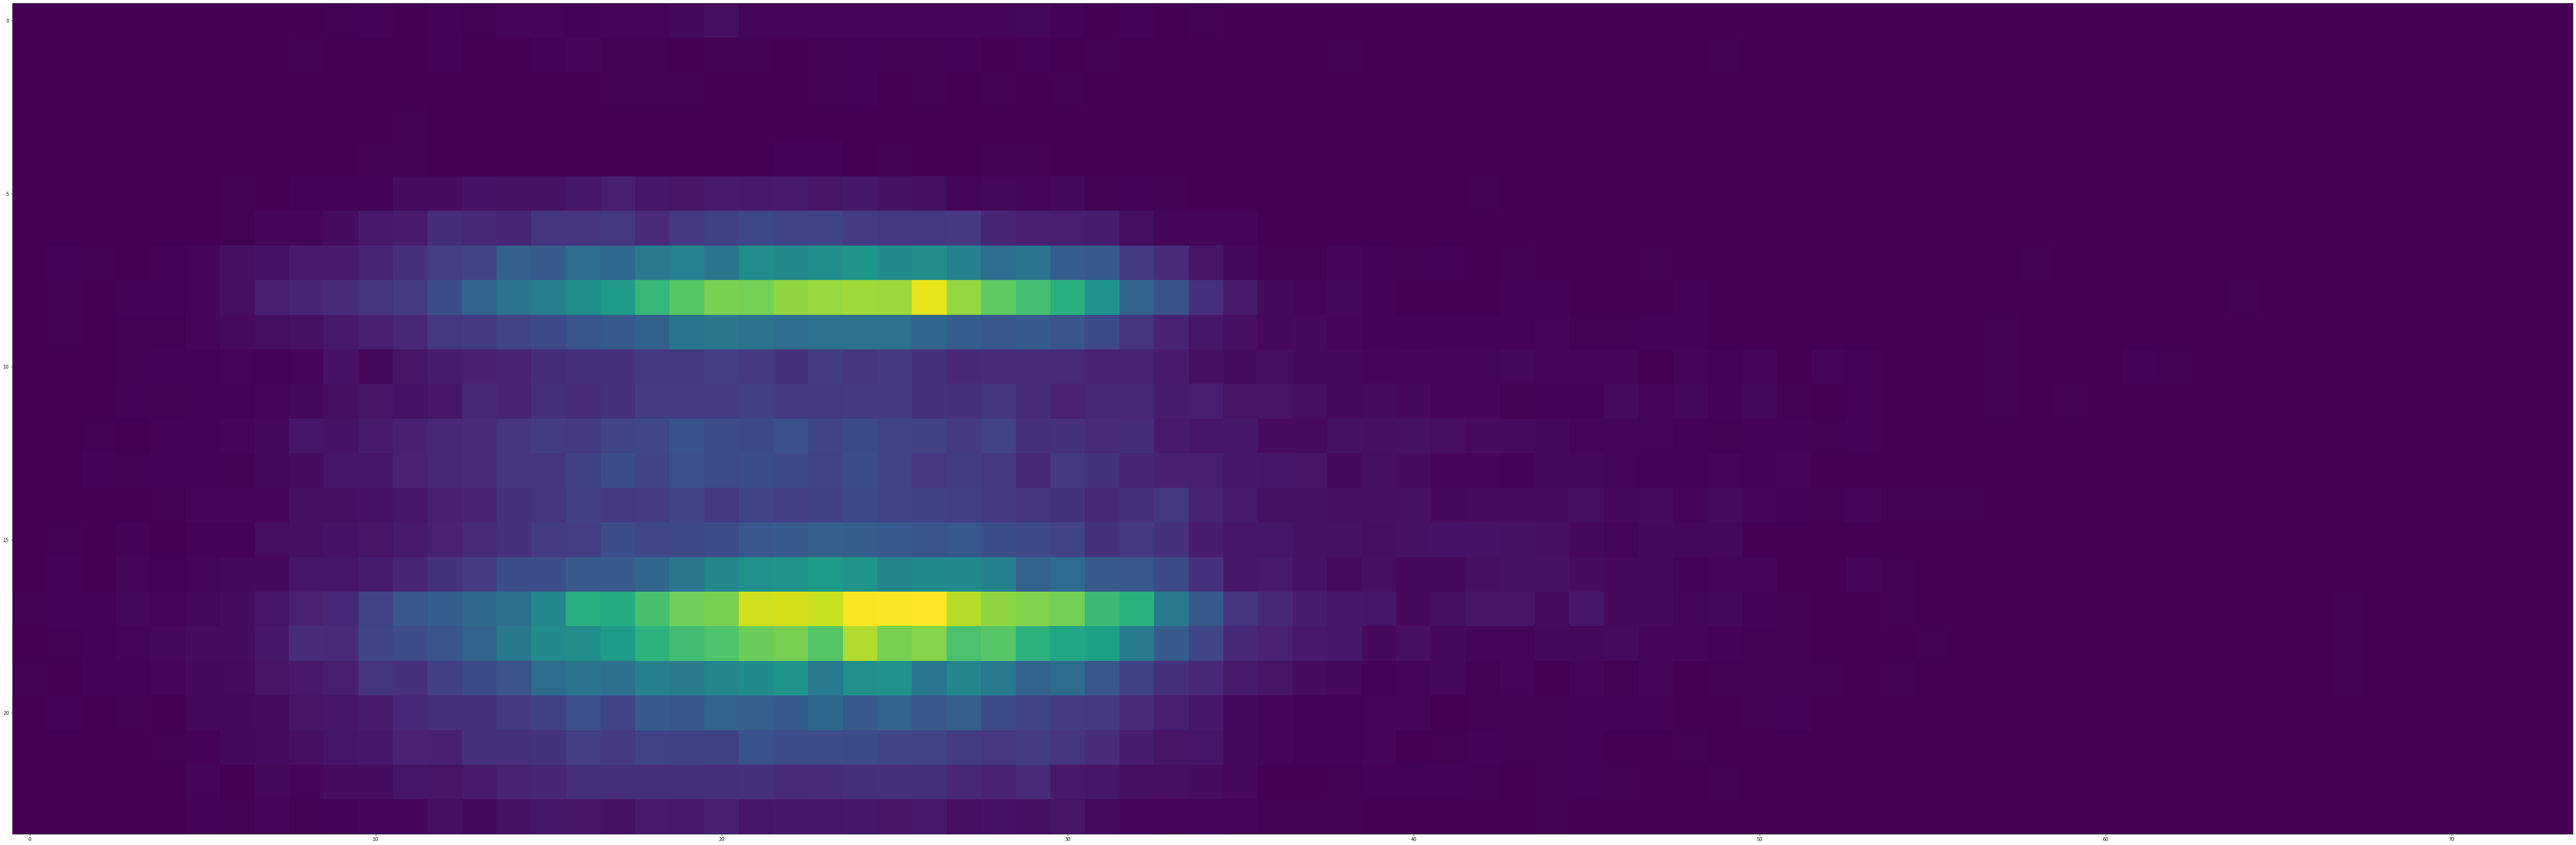

In [382]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

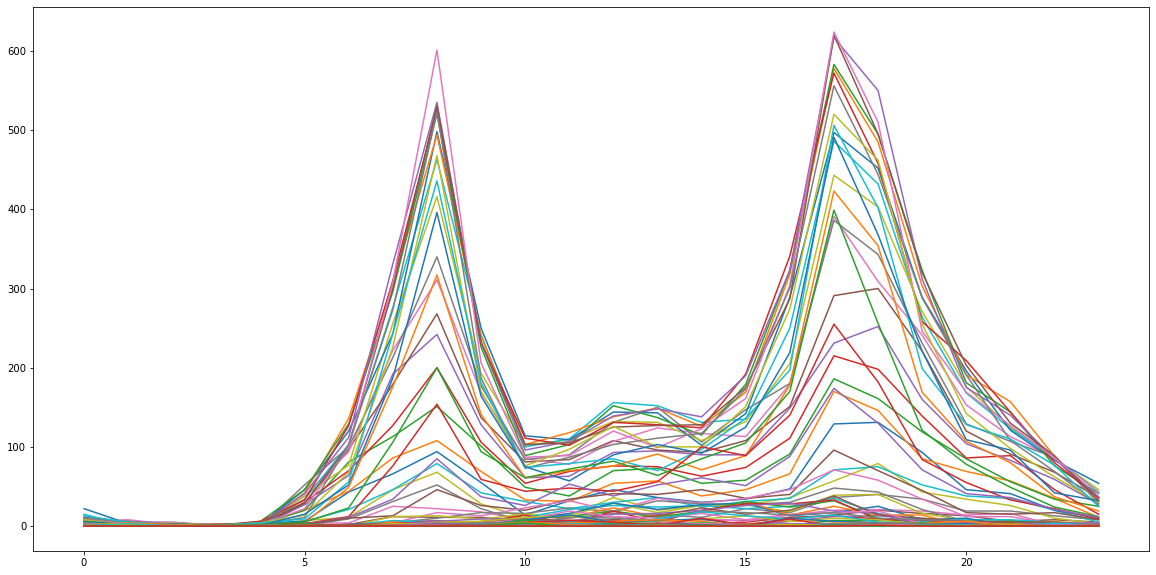

In [383]:
_=plt.plot(duration_hour)

In [384]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [385]:
np.round(.65, 1)

0.6

In [386]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [387]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [388]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

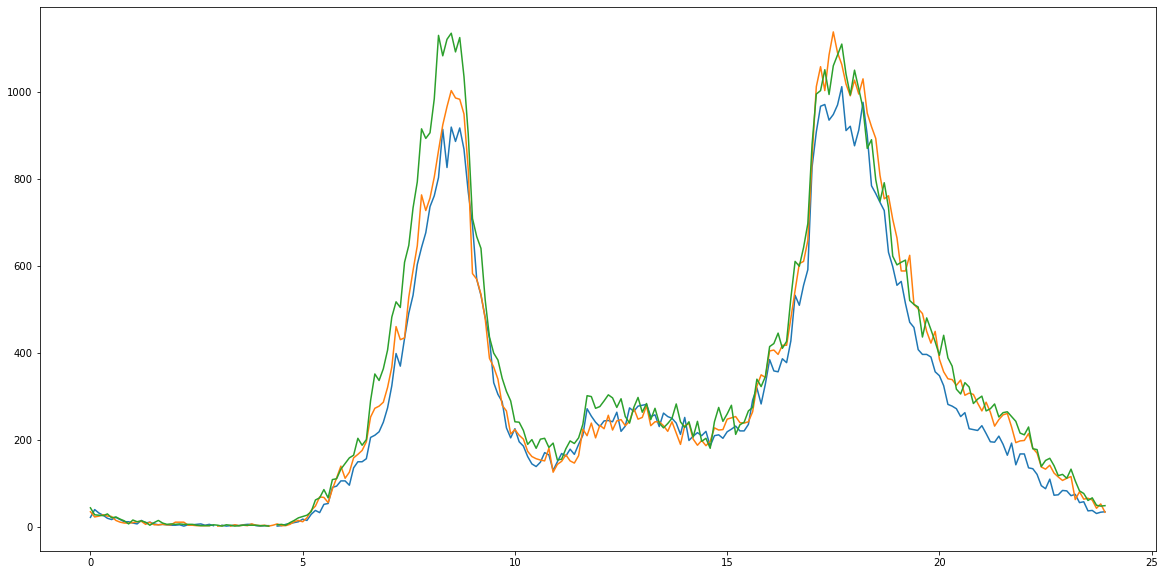

In [389]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
# plt.plot(y.index, day_hour_count[3])
# plt.plot(y.index, day_hour_count[4])
# plt.plot(y.index, day_hour_count[5])
# plt.plot(y.index, day_hour_count[6])

In [390]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


<AxesSubplot:xlabel='roundhour_of_day'>

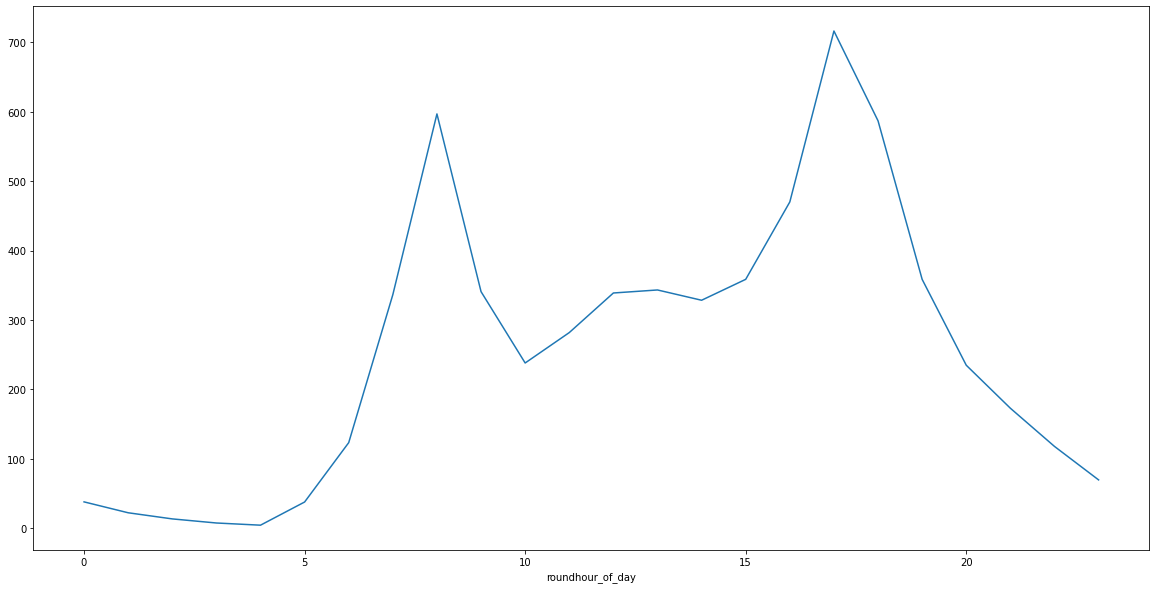

In [391]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [392]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

<AxesSubplot:xlabel='start'>

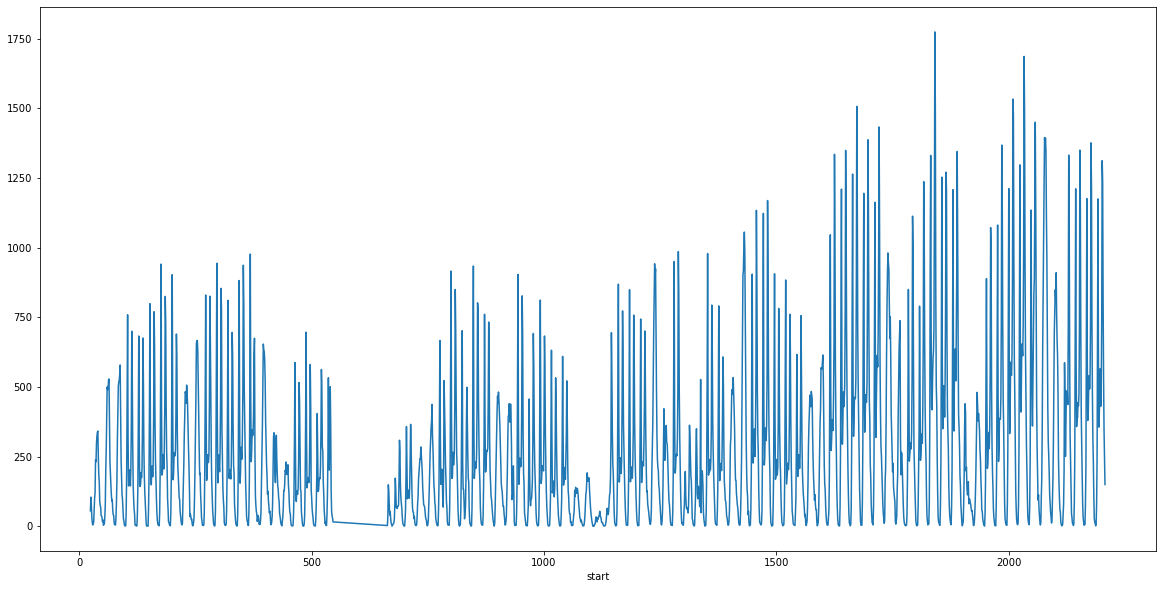

In [393]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [394]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [395]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [396]:
day_hour.start.unstack()

start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,113.0,82.0,50.0,34.0,12.0,24.0,94.0,166.0,297.0,509.0,...,910.0,761.0,667.0,611.0,475.0,243.0,158.0,101.0,62.0,51.0
88,15.0,7.0,2.0,3.0,8.0,42.0,81.0,197.0,587.0,464.0,...,481.0,437.0,696.0,1332.0,1113.0,620.0,324.0,226.0,148.0,45.0
89,31.0,11.0,9.0,3.0,8.0,79.0,240.0,727.0,1211.0,564.0,...,433.0,473.0,700.0,1350.0,1159.0,700.0,400.0,279.0,178.0,82.0


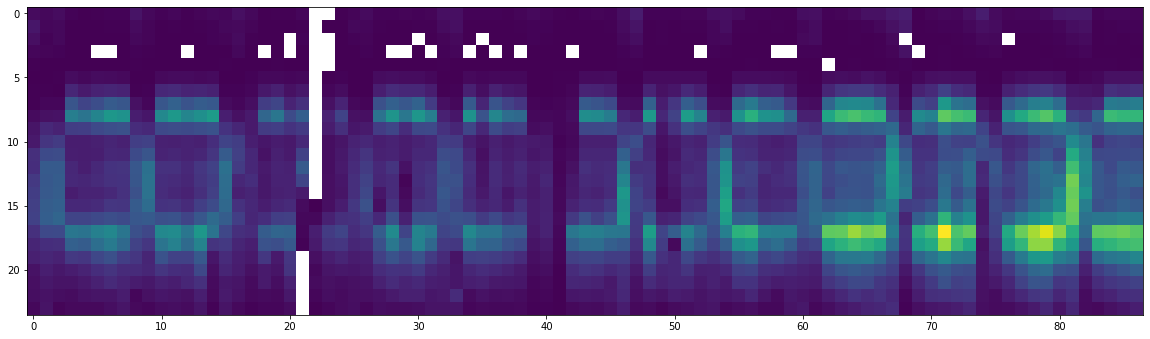

In [397]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

<AxesSubplot:xlabel='start'>

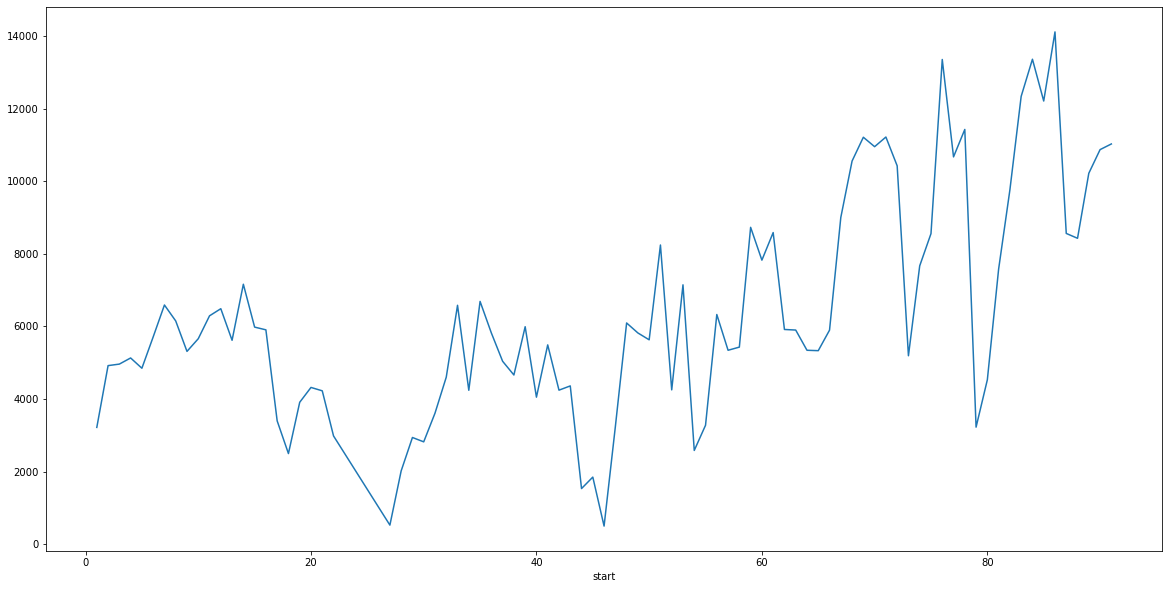

In [398]:
day_count.start.plot()

In [399]:
bikes.start.dt.dayofyear

0         91
1         91
2         91
3         91
4         91
          ..
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [400]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create two dataframes `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [401]:
monday = day_hour_count[[0]].copy()
monday["hour"] = monday.index
monday = monday[["hour",0]]
monday.columns.values[0] = 'x'
monday.columns.values[1] = 'y'
monday = monday.dropna()
monday

start,x,y
hour_of_day,,
0.0,0.0,21.0
0.1,0.1,39.0
0.2,0.2,31.0
0.3,0.3,26.0
0.4,0.4,19.0
...,...,...
23.5,23.5,36.0
23.6,23.6,37.0
23.7,23.7,30.0


In [402]:
saturday = day_hour_count[[5]].copy()
saturday["hour"] = saturday.index
saturday = saturday[["hour",5]]
saturday.columns.values[0] = 'x'
saturday.columns.values[1] = 'y'
saturday = saturday.dropna()
saturday

start,x,y
hour_of_day,,
0.0,0.0,89.0
0.1,0.1,87.0
0.2,0.2,98.0
0.3,0.3,99.0
0.4,0.4,98.0
...,...,...
23.5,23.5,93.0
23.6,23.6,95.0
23.7,23.7,105.0



## 2a. Create 3 models fit to `monday.hour_of_day` with varying polynomial degrees ( choose from `n=1,2,3,5,10,15`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [403]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
linear = linear_model.LinearRegression()
ridge = linear_model.Ridge()
poly2 = PolynomialFeatures(degree=2)
poly5 = PolynomialFeatures(degree=5)
poly10 = PolynomialFeatures(degree=10)

In [404]:
m_2 = poly2.fit_transform(np.reshape(np.array(monday.x),(-1,1)))
m_5 = poly5.fit_transform(np.reshape(np.array(monday.x),(-1,1)))
m_10 = poly10.fit_transform(np.reshape(np.array(monday.x),(-1,1)))

In [405]:
mlin2 = linear_model.LinearRegression()
mreg2 = mlin2.fit(m_2, np.array(monday.y))
mreg2.coef_, mreg2.intercept_

(array([ 0.        , 80.24566954, -2.80782655]), -149.32293022844425)

In [406]:
mlin5 = linear_model.LinearRegression()
mreg5 = mlin5.fit(m_5, np.array(monday.y))
mreg5.coef_, mreg5.intercept_

(array([ 0.00000000e+00, -9.99825847e+01,  4.85090791e+01, -6.10173662e+00,
         3.14117483e-01, -5.74822061e-03]),
 31.64817578931553)

In [407]:
mlin10 = linear_model.LinearRegression()
mreg10 = mlin10.fit(m_10, np.array(monday.y))
mreg10.coef_, mreg10.intercept_

(array([ 0.00000000e+00, -3.24367507e+02,  4.70959100e+02, -2.73160771e+02,
         7.69183872e+01, -1.17693398e+01,  1.04924859e+00, -5.59537473e-02,
         1.75287274e-03, -2.96247639e-05,  2.07218136e-07]),
 67.74669077766458)

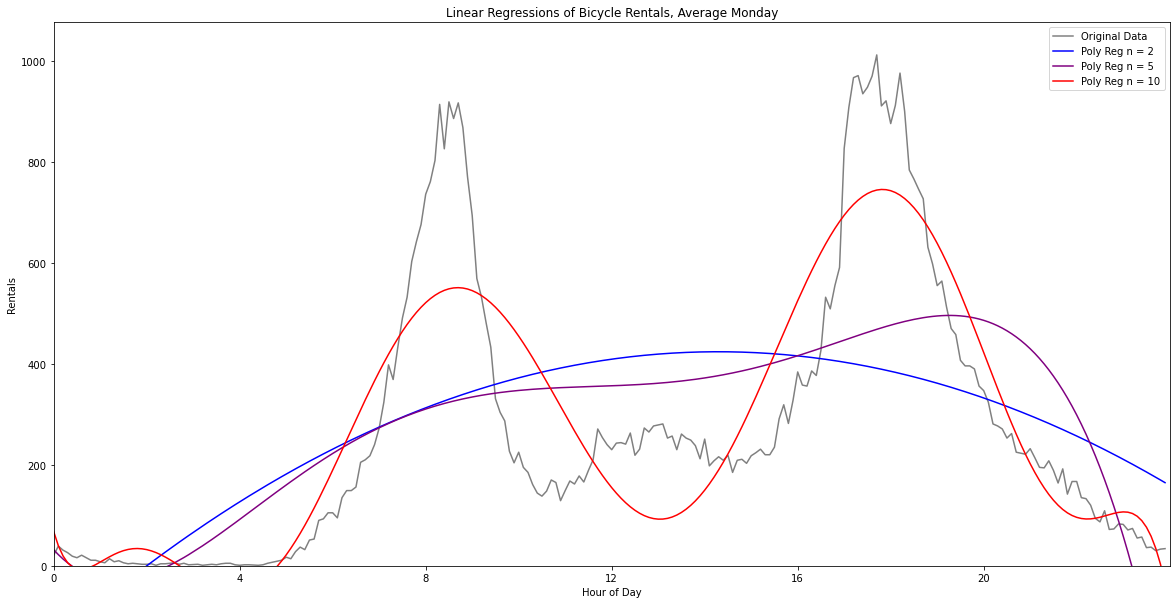

In [408]:
plt.plot(monday.x, monday.y, c = "grey", label = "Original Data")
plt.plot(monday.x, np.dot(m_2, mreg2.coef_) + mreg2.intercept_, c = "blue", label = "Poly Reg n = 2")
plt.plot(monday.x, np.dot(m_5, mreg5.coef_) + mreg5.intercept_, c = "purple", label = "Poly Reg n = 5")
plt.plot(monday.x, np.dot(m_10, mreg10.coef_) + mreg10.intercept_, c = "red", label = "Poly Reg n = 10")
plt.title("Linear Regressions of Bicycle Rentals, Average Monday")
plt.ylabel("Rentals")
plt.xlabel("Hour of Day")
plt.ylim(0,)
plt.xlim(0,24)
plt.xticks(np.arange(0,24,4))
plt.legend()

For the linear regressions on Monday data, I chose n = 2, 5, and 10 to observe the different outputs in a relatively tight scale of graduating polynomial degrees. Given the linear regression of n = 10 tracks the peaks and middle trough in the underlying data, I would recommend n = 10 and consider regression of polynomials of higher degrees.

## 2b. Repeat `2a` for `saturday.hour_of_day`

In [409]:
poly15 = PolynomialFeatures(degree=15)
s_5 = poly5.fit_transform(np.reshape(np.array(saturday.x),(-1,1)))
s_10 = poly10.fit_transform(np.reshape(np.array(saturday.x),(-1,1)))
s_15 = poly15.fit_transform(np.reshape(np.array(saturday.x),(-1,1)))

In [410]:
slin5 = linear_model.LinearRegression()
sreg5 = slin5.fit(s_5, np.array(saturday.y))
sreg5.coef_, sreg5.intercept_

(array([ 0.00000000e+00, -7.69357325e+01,  8.78980568e+00,  7.64304295e-01,
        -9.33173938e-02,  2.15983799e-03]),
 133.0629876933288)

In [411]:
slin10 = linear_model.LinearRegression()
sreg10 = slin10.fit(s_10, np.array(saturday.y))
sreg10.coef_, sreg10.intercept_

(array([ 0.00000000e+00, -1.06243573e+02,  7.68687730e+01, -2.75212402e+01,
         4.19823816e+00, -1.52542563e-01, -2.81255072e-02,  3.78497509e-03,
        -1.98099688e-04,  4.95250294e-06, -4.89254859e-08]),
 109.69331362588565)

In [412]:
slin15 = linear_model.LinearRegression()
sreg15 = slin15.fit(s_15, np.array(saturday.y))
sreg15.coef_, sreg15.intercept_

(array([ 0.00000000e+00, -3.68583464e-08,  7.50154793e-09,  4.96620206e-08,
         3.15663041e-07,  1.76321105e-06,  8.23216637e-06,  2.88039172e-05,
         5.63721021e-05, -9.20961742e-06, -3.58439459e-07,  1.76722512e-07,
        -1.61522899e-08,  7.01238183e-10, -1.52197145e-11,  1.33146682e-13]),
 23.404435041546833)

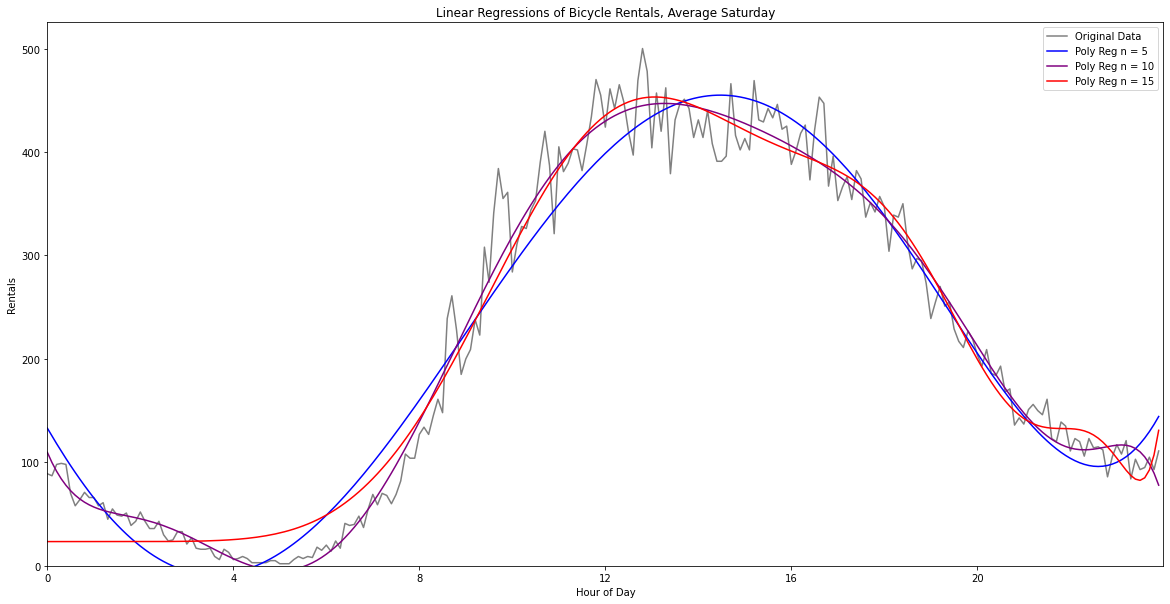

In [413]:
plt.plot(saturday.x, saturday.y, c = "grey", label = "Original Data")
plt.plot(saturday.x, np.dot(s_5, sreg5.coef_) + sreg5.intercept_, c = "blue", label = "Poly Reg n = 5")
plt.plot(saturday.x, np.dot(s_10, sreg10.coef_) + sreg10.intercept_, c = "purple", label = "Poly Reg n = 10")
plt.plot(saturday.x, np.dot(s_15, sreg15.coef_) + sreg15.intercept_, c = "red", label = "Poly Reg n = 15")
plt.title("Linear Regressions of Bicycle Rentals, Average Saturday")
plt.ylabel("Rentals")
plt.xlabel("Hour of Day")
plt.ylim(0,)
plt.xlim(0,24)
plt.xticks(np.arange(0,24,4))
plt.legend()

For the linear regressions on Saturday data, I chose polynomials of higher degrees at n = 5, 10, and 15 after observing the higher n provide the best results on the Monday data. However, in this case, the linear regression of n - 10 provides the best representation compared to the original data, given it tracks the line of the underlying data for all hours of the day, whereas n = 5 and n = 15 are either too high or too low before hour 8.

## 3. create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values using the `monday` and `saturday` datasets.


In [414]:
#Monday
mrid025 = linear_model.Ridge(alpha = 0.25)
mrid10 = linear_model.Ridge(alpha = 10)
mrid50 = linear_model.Ridge(alpha = 50)

In [415]:
mridreg025 = mrid025.fit(m_10, monday.y)
mridreg025.coef_, mridreg025.intercept_

/Users/don/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.59143e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


(array([ 0.00000000e+00, -5.32059121e+01,  1.98712846e+02, -1.53588084e+02,
         4.85862763e+01, -7.77041628e+00,  6.97250042e-01, -3.64499921e-02,
         1.09168464e-03, -1.70989200e-05,  1.05638925e-07]),
 1.2841137777534755)

In [416]:
mridreg10 = mrid10.fit(m_10, monday.y)
mridreg10.coef_, mridreg10.intercept_

/Users/don/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.63657e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


(array([ 0.00000000e+00,  2.66318698e+01,  1.75154422e+01, -4.65473695e+01,
         1.87612200e+01, -3.09997328e+00,  2.55113634e-01, -1.05925995e-02,
         1.77735844e-04,  8.01267643e-07, -4.35228608e-08]),
 30.598216198831608)

In [417]:
mridreg50 = mrid50.fit(m_10, monday.y)
mridreg50.coef_, mridreg50.intercept_

/Users/don/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.30711e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


(array([ 0.00000000e+00,  4.58496368e+00, -3.90516798e+00, -2.31187707e+01,
         1.06780637e+01, -1.67811508e+00,  1.10020132e-01, -1.64426362e-03,
        -1.51404159e-04,  7.45137477e-06, -1.00342887e-07]),
 51.47526768764811)

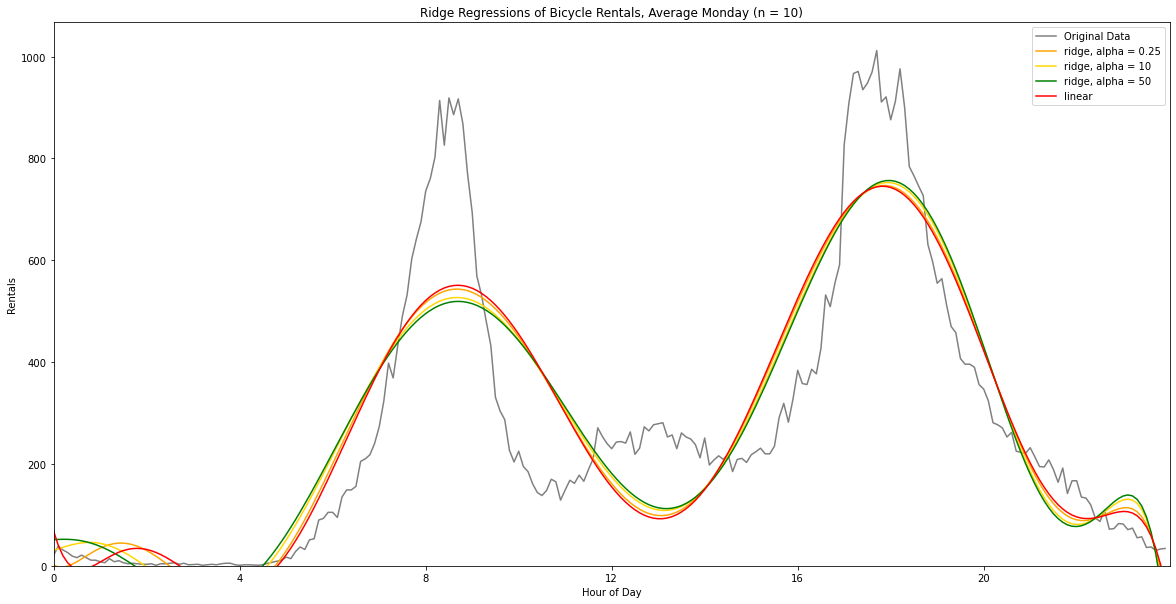

In [418]:
plt.plot(monday.x, monday.y, c = "grey", label = "Original Data")
plt.plot(monday.x, np.dot(m_10, mridreg025.coef_) + mridreg025.intercept_, c = "orange", label = "ridge, alpha = 0.25")
plt.plot(monday.x, np.dot(m_10, mridreg10.coef_) + mridreg10.intercept_, c = "gold", label = "ridge, alpha = 10")
plt.plot(monday.x, np.dot(m_10, mridreg50.coef_) + mridreg50.intercept_, c = "green", label = "ridge, alpha = 50")
plt.plot(monday.x, np.dot(m_10, mreg10.coef_) + mreg10.intercept_, c = "red", label = "linear")
plt.title("Ridge Regressions of Bicycle Rentals, Average Monday (n = 10)")
plt.ylabel("Rentals")
plt.xlabel("Hour of Day")
plt.ylim(0,)
plt.xlim(0,24)
plt.xticks(np.arange(0,24,4))
plt.legend()

For the ridge regression of Monday data, I chose to use the polynomial data at n = 10 given it provided the best results in the prior linear regression. I set alphas of 0.25, 10, and 50 to explore a range of shrinkage penalties. While all models formed a similar shape between hours 4 and ~22 with slight variances in amplitude at the peaks and troughs, there was high variance when the data was fairly stable before hour 4, and various severity of loss after hour 22. Given the similarity among the ridge regressions for most of the data, I would choose a ridge model with a small alpha (orange line) to stiffen out the variance on the low and high ends.

In [419]:
#Saturday
srid075 = linear_model.Ridge(alpha = 0.75)
srid20 = linear_model.Ridge(alpha = 20)
srid100 = linear_model.Ridge(alpha = 100)

In [420]:
sridreg075 = srid075.fit(s_15, saturday.y)
sridreg075.coef_, sridreg075.intercept_

(array([ 0.00000000e+00, -5.43292635e-03,  2.21016441e+00, -4.36396850e+00,
        -6.46714128e+00,  6.22188667e+00, -2.38129440e+00,  5.28070231e-01,
        -7.56539007e-02,  7.34513221e-03, -4.93575571e-04,  2.30057545e-05,
        -7.30846821e-07,  1.51113236e-08, -1.83488201e-10,  9.93508353e-13]),
 150.8102062225342)

In [421]:
sridreg20 = srid20.fit(s_15, saturday.y)
sridreg20.coef_, sridreg20.intercept_

(array([ 0.00000000e+00, -2.35719532e-03,  1.87600025e+00, -5.12794997e+00,
        -2.62316810e+00,  3.34067744e+00, -1.33505189e+00,  2.98675200e-01,
        -4.24534778e-02,  4.03544333e-03, -2.62225042e-04,  1.16725077e-05,
        -3.49430320e-07,  6.70649805e-09, -7.42499932e-11,  3.58500570e-13]),
 127.7705891609192)

In [422]:
sridreg100 = srid100.fit(s_15, saturday.y)
sridreg100.coef_, sridreg100.intercept_

(array([ 0.00000000e+00,  2.35578055e-03,  1.37637802e+00, -2.56147981e+00,
        -1.36243098e+00,  1.40508417e+00, -4.94185689e-01,  9.78362744e-02,
        -1.18506874e-02,  8.76376158e-04, -3.57170131e-05,  3.58746798e-07,
         3.72282219e-08, -1.92080443e-09,  3.90444447e-11, -3.05840842e-13]),
 93.39546148777009)

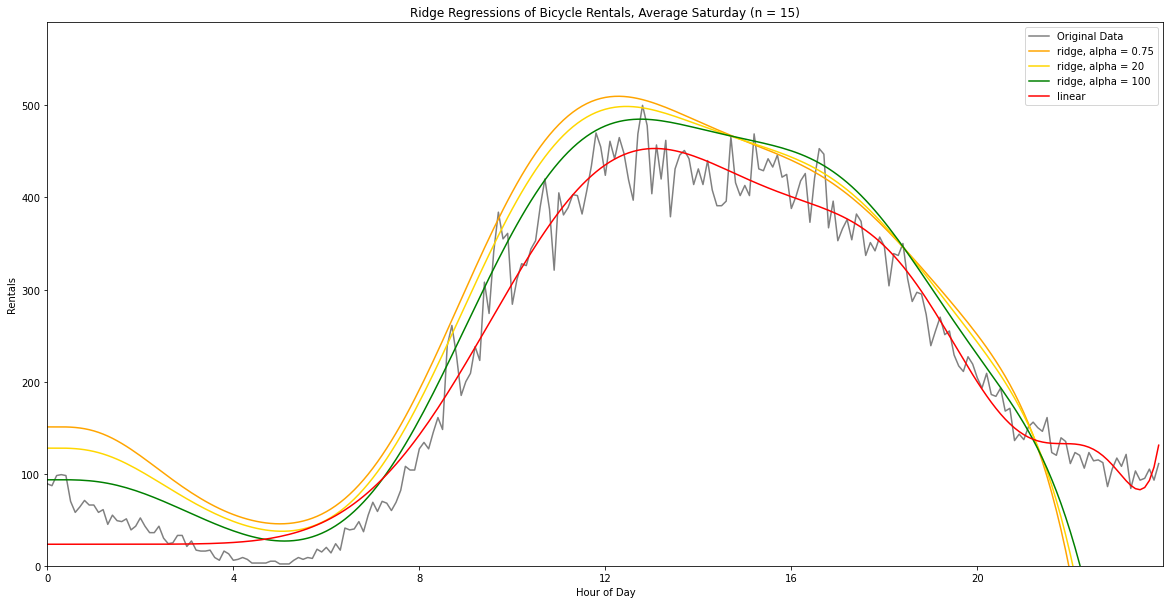

In [423]:
plt.plot(saturday.x, saturday.y, c = "grey", label = "Original Data")
plt.plot(saturday.x, np.dot(s_15, sridreg075.coef_) + sridreg075.intercept_, c = "orange", label = "ridge, alpha = 0.75")
plt.plot(saturday.x, np.dot(s_15, sridreg20.coef_) + sridreg20.intercept_, c = "gold", label = "ridge, alpha = 20")
plt.plot(saturday.x, np.dot(s_15, sridreg100.coef_) + sridreg100.intercept_, c = "green", label = "ridge, alpha = 100")
plt.plot(saturday.x, np.dot(s_15, sreg15.coef_) + sreg15.intercept_, c = "red", label = "linear")
plt.title("Ridge Regressions of Bicycle Rentals, Average Saturday (n = 15)")
plt.ylabel("Rentals")
plt.xlabel("Hour of Day")
plt.ylim(0,)
plt.xlim(0,24)
plt.xticks(np.arange(0,24,4))
plt.legend()

For the ridge regression of Saturday data, I wanted to observe more drastic effects of alpha, so I chose the polynomial of 15 data rather than the more accurate polynomial of 10 from above. (I initially tried the polynomial of 10, but perhaps because of its accurate fit, various alphas did not create a discernable difference in the charts.) With the regression on a polynomial of 15 not being as well fit to the data, higher alphas stiffen the regression line closer to the underlying data, but all three lines overshot the data line and observed loss at hour 21. Of the three, the ridge regression with the highest alpha (100) followed the underlying data most closely, but the linear regression at polynomial of 15 or a ridge regression at polynomial of 10 would be the recommended model.